In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
% matplotlib inline

# Obtain Data

In [6]:
filename = './spambase.data'

In [7]:
df = pd.read_csv(filename, header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
X = df.drop(labels=57, axis = 1).as_matrix()
y = df[57].as_matrix()

# Normalization

In [10]:
X

array([[  0.00000000e+00,   6.40000000e-01,   6.40000000e-01, ...,
          3.75600000e+00,   6.10000000e+01,   2.78000000e+02],
       [  2.10000000e-01,   2.80000000e-01,   5.00000000e-01, ...,
          5.11400000e+00,   1.01000000e+02,   1.02800000e+03],
       [  6.00000000e-02,   0.00000000e+00,   7.10000000e-01, ...,
          9.82100000e+00,   4.85000000e+02,   2.25900000e+03],
       ..., 
       [  3.00000000e-01,   0.00000000e+00,   3.00000000e-01, ...,
          1.40400000e+00,   6.00000000e+00,   1.18000000e+02],
       [  9.60000000e-01,   0.00000000e+00,   0.00000000e+00, ...,
          1.14700000e+00,   5.00000000e+00,   7.80000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   6.50000000e-01, ...,
          1.25000000e+00,   5.00000000e+00,   4.00000000e+01]])

In [11]:
X = (X - np.mean(X, axis = 0))/np.var(X, axis = 0)

In [12]:
print (X.shape)
print (y.shape)

(4601, 57)
(4601,)


# Add bias in data

In [13]:
X = np.insert(X,0, 1, axis = 1)

In [14]:
X.shape

(4601, 58)

# Split data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3680, 58)
(921, 58)
(3680, 1)
(921, 1)


# logistic regression

In [18]:
class logistic_classifier:
    def __init__(self, learning_rate, num_iteration):
        self.learning_rate = learning_rate
        self.beta = np.random.randn(X.shape[1], 1)
        self.num_iteration = num_iteration
        
    def _sigmoid_(self):
        return 1/(1 + np.exp(-self.ax))
    
    def _gradient_(self, x, y):
        gradient = ((y - self.zx)*(self._sigmoid_()*(1-self._sigmoid_()))*x).reshape(X.shape[1], 1)

        return gradient
    
    def _update_(self, gradient):
        #print "shape of gradient", gradient.shape
        #print "shape of beta", self.beta.shape
        self.beta += -1*self.learning_rate*gradient
    
    def _error_function(self, y):
        loss_value = ((y - self.zx)**2)/2
        return loss_value
        
    def fit(self, X, y):
        loss_value_lst = []
        
        for _ in range(self.num_iteration):
            
            index = np.random.choice(X.shape[0])
            
            self.ax = X[index].dot(self.beta)
            #print "ax",self.ax
            
            self.zx = self._sigmoid_()
            #print "zx", self.zx
            
            loss_value = self._error_function(y[index])
            
            #print "index", index
            #print "X,y",X[index],y[index]
            #print "loss value", loss_value
            
            gradient = self._gradient_(X[index], y[index])
            #print "gradient", gradient
            
            
            self._update_(gradient)
            
            loss_value_lst.append(loss_value)
            
        return loss_value_lst
    #def predict():
        
        
    #def score():

In [19]:
num = 100
lr = 0.0001
classifier = logistic_classifier(learning_rate=lr, num_iteration=num)

In [23]:
loss_values = classifier.fit(X_train, y_train)
loss_values

[array([  5.79191904e-13]),
 array([  3.99452828e-08]),
 array([ 0.5]),
 array([ 0.00319617]),
 array([  2.07417499e-15]),
 array([ 0.5]),
 array([ 0.49996838]),
 array([ 0.01196953]),
 array([  5.13515432e-08]),
 array([ 0.48085203]),
 array([ 0.49999727]),
 array([ 0.01767302]),
 array([  1.28212706e-07]),
 array([  2.67767494e-07]),
 array([ 0.49999987]),
 array([  1.24545348e-08]),
 array([ 0.49998565]),
 array([ 0.00057127]),
 array([ 0.5]),
 array([  5.79084358e-07]),
 array([ 0.4969091]),
 array([ 0.49956637]),
 array([ 0.000666]),
 array([ 0.5]),
 array([ 0.479637]),
 array([ 0.02593805]),
 array([ 0.45966144]),
 array([ 0.5]),
 array([ 0.5]),
 array([ 0.5]),
 array([ 0.49990934]),
 array([ 0.49627604]),
 array([  9.56177212e-08]),
 array([ 0.14437117]),
 array([  3.02496810e-22]),
 array([ 0.00259244]),
 array([ 0.49999927]),
 array([ 0.06151414]),
 array([ 0.10484284]),
 array([  1.25483264e-06]),
 array([ 0.08877624]),
 array([ 0.49401472]),
 array([ 0.48020654]),
 array([ 0

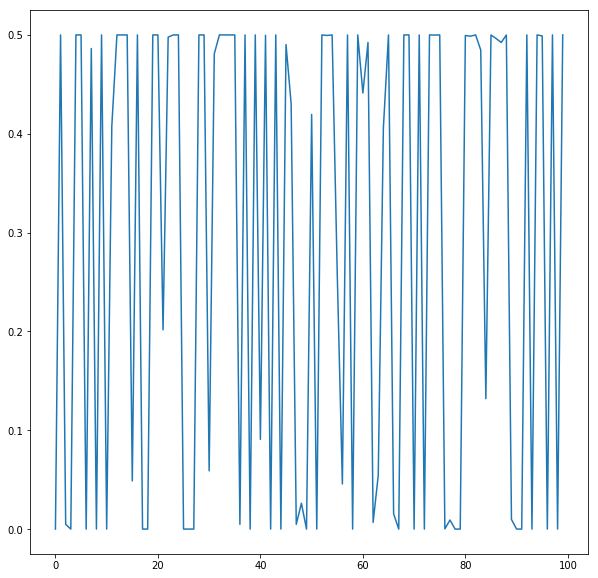

In [21]:
plt.figure(figsize=(10,10))
plt.plot(range(num), loss_values)